This is described by an equation of the form
$$
\frac1{t^2} \frac{d}{dt}\left(t^2 \frac{d\theta}{dt}\right) + \theta^n = 0
$$

In [1]:
from integrators import contact as ic
from integrators.common import rk4

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class LaneEmden:
    def __init__(self, n):
        self.n = n

    def f(self, t):
        return 2/t
    
    def V(self, q, t):
        return q**(self.n+1)/(self.n+1)
    
    def Vq(self, q, t):
        return q**self.n

In [84]:
upper_error_bound = lambda n, m, dt, p0, q0: abs((((21605+168*m*(1+m)*(-17+240*m*(1+m)))*p0*dt)/(15120*(1+2*m)**6)
                                             )+((-15+28*m*(1+m)*(31+60*m*(1+m)))*dt**2 * q0**n)*(-1)/(
    315*(1+2*m)**5)+((559+336*m*(1+m)*(19+40*m*(1+m)))*n*p0*q0**(n-1) * dt**3)/(5040*(1+2*m)**4))
        
upper_error_bound_p = lambda n, m, dt, p0, q0: abs((2*(141+28*m*(1+m)*(3+20*m*(1+m)))*p0)/(105*(1+2*m)**7)+(
    (2617+120*m*(1+m)*(37+144*m*(m+1)))*dt*q0**n)/(2160*(1+2*m)**6)+((-15+28*m(1+m)*(31+60*m*(1+m)))*n*p0*q0**(n-1)*dt**2
                                                                    )/(315*(1+2*m)**5)+((n*q**(n-2)*((-1)*(559+336*m*(1+m)*(19+40*m*(1+m))
                                                                )*(-1+n)*p0**2+(-505+336*m*(1+m)*(-1+40*m*(1+m)))*q0**(n+1)))*dt**3
                                                                                    )/(10080*(1+2*m)**4))

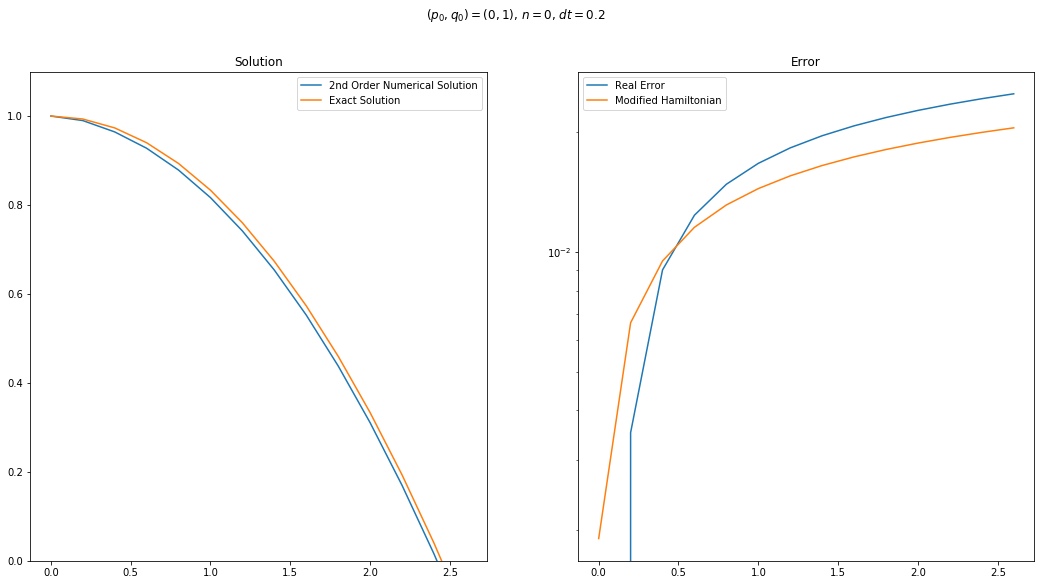

In [122]:
le = LaneEmden(0)
dt = 0.2
tf = 2.7
n=0
tspan = np.arange(0.0, tf, dt)

exact = lambda t: 1-1/6*t**2
errq = lambda m, p0, q0: upper_error_bound(n,m,dt,p0,q0)
errp = lambda m, p0, q0: upper_error_bound_p(n,m,dt,p0,q0)
st1=tspan/dt
plt.figure(figsize=(18,9))
plt.suptitle(f"$(p_0,q_0)=({p0},{q0})$, $n={le.n}$, $dt={dt}$")
p0, q0 = (0,1)
sol, _, _ = ic.integrate(ic.step, le, tspan, p0, q0, 0.0)

#p1, q1 = sol[:,0][1], sol[:,1][1]
#solm1, _, _ = ic.integrate(ic.step6, le, tspan[1:], p1, q1, 0.0)
#sole1, _, _ = ic.integrate(ic.step6e, le, tspan[1:], p1, q1, 0.0)

plt.subplot(121)
plt.title("Solution")
plt.plot(tspan,sol[:,1],label="2nd Order Numerical Solution")
plt.plot(tspan, exact(tspan),
         label="Exact Solution")
plt.ylim(0,1.1)
plt.legend()
    
plt.subplot(122)
plt.title("Error")
plt.plot(tspan,abs(sol[:,1]-exact(tspan)),label="Real Error")
plt.plot(tspan,np.cumsum([errq((m/dt),p0,q0) for m, p0, q0 in zip(tspan,sol[:,0],sol[:,1])]),
         label="Modified Hamiltonian")
plt.legend()
plt.yscale("log")
plt.legend()

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


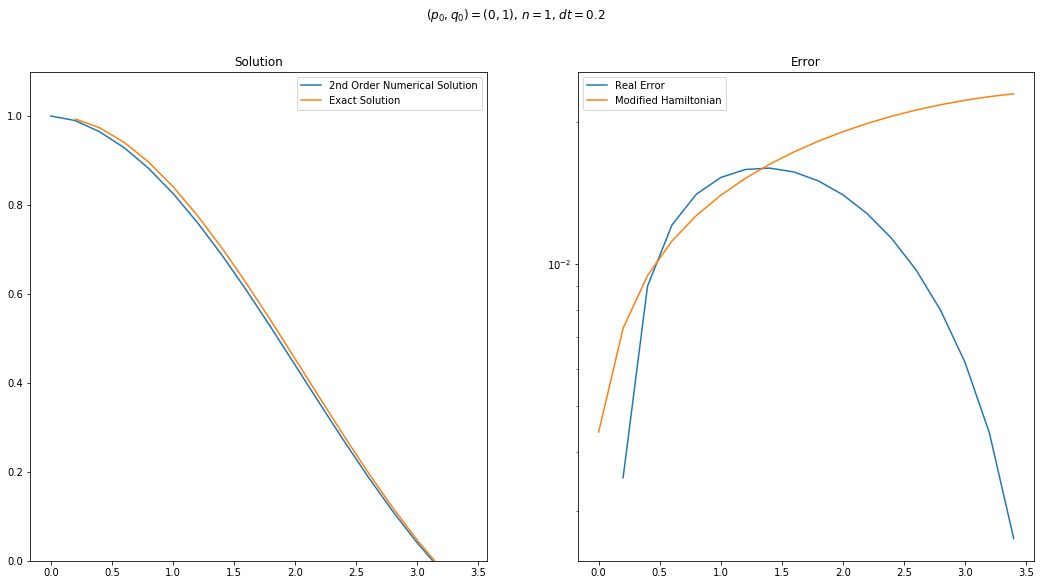

In [125]:
le = LaneEmden(1)
dt = 0.2
tf = 3.5
n=1
tspan = np.arange(0.0, tf, dt)
exact = lambda t: np.sin(t)/t
errq = lambda m, p0, q0: upper_error_bound(n,m,dt,p0,q0)
errp = lambda m, p0, q0: upper_error_bound_p(n,m,dt,p0,q0)
st1=tspan/dt
plt.figure(figsize=(18,9))
plt.suptitle(f"$(p_0,q_0)=({p0},{q0})$, $n={le.n}$, $dt={dt}$")
p0, q0 = (0,1)
sol, _, _ = ic.integrate(ic.step, le, tspan, p0, q0, 0.0)

#p1, q1 = sol[:,0][1], sol[:,1][1]
#solm1, _, _ = ic.integrate(ic.step6, le, tspan[1:], p1, q1, 0.0)
#sole1, _, _ = ic.integrate(ic.step6e, le, tspan[1:], p1, q1, 0.0)

plt.subplot(121)
plt.title("Solution")
plt.plot(tspan,sol[:,1],label="2nd Order Numerical Solution")
plt.plot(tspan, exact(tspan),
         label="Exact Solution")
plt.ylim(0,1.1)
plt.legend()

plt.subplot(122)
plt.title("Error")
plt.plot(tspan,abs(sol[:,1]-exact(tspan)),label="Real Error")
plt.plot(tspan,np.cumsum([errq((m/dt+1),p0,q0) for m, p0, q0 in zip(tspan,sol[:,0],sol[:,1])]),
         label="Modified Hamiltonian")
plt.legend()
plt.yscale("log")
plt.legend()
plt.show()

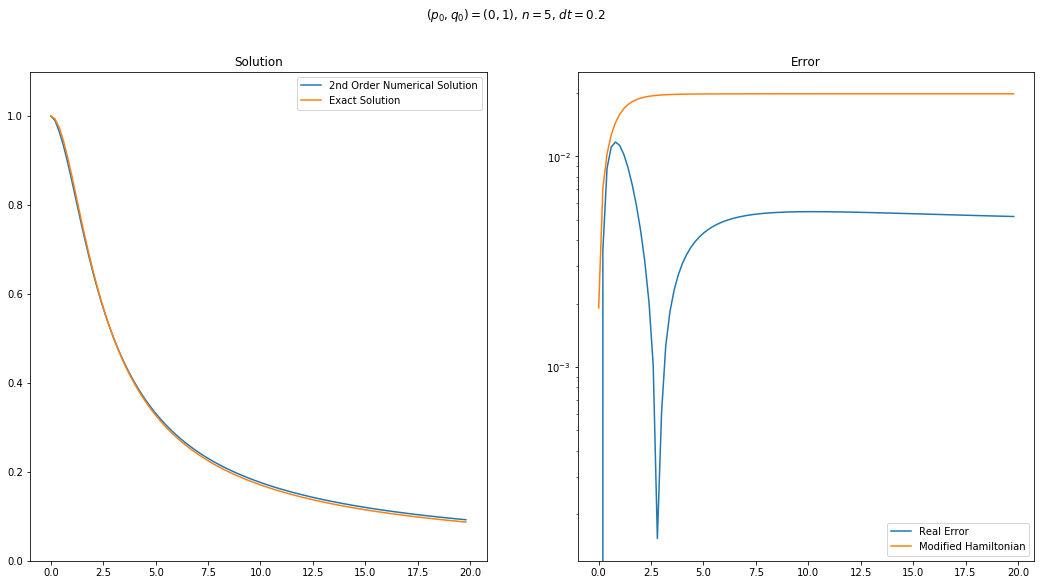

In [127]:
le = LaneEmden(5)
dt = 0.2
tf = 20
n=5
tspan = np.arange(0.0, tf, dt)
exact = lambda t: 1/np.sqrt(1 + t**2/3)

errq = lambda m, p0, q0: upper_error_bound(n,m,dt,p0,q0)
errp = lambda m, p0, q0: upper_error_bound_p(n,m,dt,p0,q0)
st1=tspan/dt
plt.figure(figsize=(18,9))
plt.suptitle(f"$(p_0,q_0)=({p0},{q0})$, $n={le.n}$, $dt={dt}$")
p0, q0 = (0,1)
sol, _, _ = ic.integrate(ic.step, le, tspan, p0, q0, 0.0)

#p1, q1 = sol[:,0][1], sol[:,1][1]
#solm1, _, _ = ic.integrate(ic.step6, le, tspan[1:], p1, q1, 0.0)
#sole1, _, _ = ic.integrate(ic.step6e, le, tspan[1:], p1, q1, 0.0)

plt.subplot(121)
plt.title("Solution")
plt.plot(tspan,sol[:,1],label="2nd Order Numerical Solution")
plt.plot(tspan, exact(tspan),
         label="Exact Solution")
plt.ylim(0,1.1)
plt.legend()

plt.subplot(122)
plt.title("Error")
plt.plot(tspan,abs(sol[:,1]-exact(tspan)),label="Real Error")
plt.plot(tspan,np.cumsum([errq((m/dt),p0,q0) for m, p0, q0 in zip(tspan,sol[:,0],sol[:,1])]),
         label="Modified Hamiltonian")
plt.legend()
plt.yscale("log")
plt.legend()
plt.show()